In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt 

%matplotlib inline
tf.__version__

'2.1.0'

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:

X_train = X_train/255.0
X_test = X_test/255.0 

In [6]:
X_test.shape

(10000, 32, 32, 3)

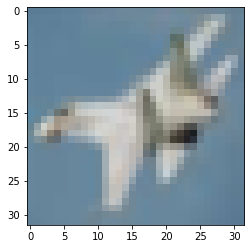

In [7]:
plt.imshow(X_test[10])

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = 'relu', input_shape = [32,32,3] ))

In [10]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,padding = "same", activation = 'relu' ))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid",strides = 2 ))

In [11]:
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3,padding = "same", activation = 'relu' ))

In [12]:
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3,padding = "same", activation = 'relu' ))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid",strides = 2 ))

In [13]:
model.add(tf.keras.layers.Flatten())

In [14]:
model.add(tf.keras.layers.Dense(units = 128, activation = "relu"))

In [15]:
model.add(tf.keras.layers.Dense(units = 10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [17]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "Adam", metrics = ["sparse_categorical_accuracy"])

In [18]:
model.fit(X_train,y_train,epochs = 10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 271us/sample - loss: 1.3696 - sparse_categorical_accuracy: 0.5070
Epoch 2/10
50000/50000 [==============================] - 11s 217us/sample - loss: 0.9060 - sparse_categorical_accuracy: 0.6816
Epoch 3/10
50000/50000 [==============================] - 12s 230us/sample - loss: 0.7298 - sparse_categorical_accuracy: 0.7450
Epoch 4/10
50000/50000 [==============================] - 12s 243us/sample - loss: 0.6021 - sparse_categorical_accuracy: 0.7868 - loss: 0.6036 - sparse_categorical_acc - ETA: 1s - loss: 0.6016 - sparse_categoric
Epoch 5/10
50000/50000 [==============================] - 12s 243us/sample - loss: 0.4949 - sparse_categorical_accuracy: 0.8259 - loss: - ETA: 0s - loss: 0.4937 - sparse_categorical_accurac
Epoch 6/10
50000/50000 [==============================] - 12s 239us/sample - loss: 0.3984 - sparse_categorical_accuracy: 0.8576s -  - ETA: 9s - loss: 0.3 - ETA: 7s - loss: 0.3733 - sparse_cat

In [19]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 129us/sample - loss: 1.3125 - sparse_categorical_accuracy: 0.7288


In [20]:
print(f"Test loss: {test_loss}")

Test loss: 1.312510637664795


In [21]:
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.7287999987602234
